In [9]:
from tp2_csp.v2.algorithm import run
import matplotlib.pyplot as plt
from tp2_csp.v2.parameters import Parameters
from tp2_csp.v2.result import SimulationResult

In [10]:
import concurrent.futures

parameters_for_simulations: list[Parameters] = [
    Parameters(
        population_size=1_000,
        generations=100,
        tournament_size=20,
        mutation_rate=0.60,
        crossover_rate=0.8,
        elitism_size=0,
        mutation_strategy="ReverseSubsequence",
        cuts_layout_strategy="InOrder",
    ),
    Parameters(
        population_size=1_000,
        generations=100,
        tournament_size=20,
        mutation_rate=0.50,
        crossover_rate=0.8,
        elitism_size=10,
        mutation_strategy="ReverseSubsequence",
        cuts_layout_strategy="InOrder",
    ),
    Parameters(
        population_size=1_000,
        generations=100,
        tournament_size=20,
        mutation_rate=0.60,
        crossover_rate=0.8,
        elitism_size=0,
        mutation_strategy="SwapCuts",
        cuts_layout_strategy="InOrder",
    ),
]

parameters_with_results: list[tuple[Parameters, SimulationResult]]
with concurrent.futures.ProcessPoolExecutor() as executor:
    parameters_with_results = list(zip(parameters_for_simulations, executor.map(run, parameters_for_simulations)))

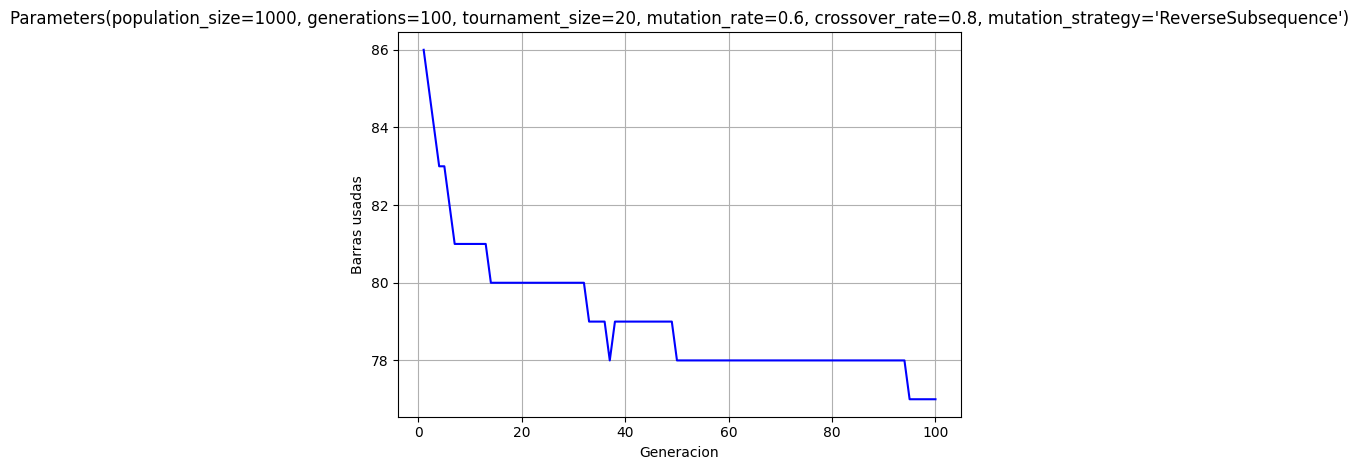

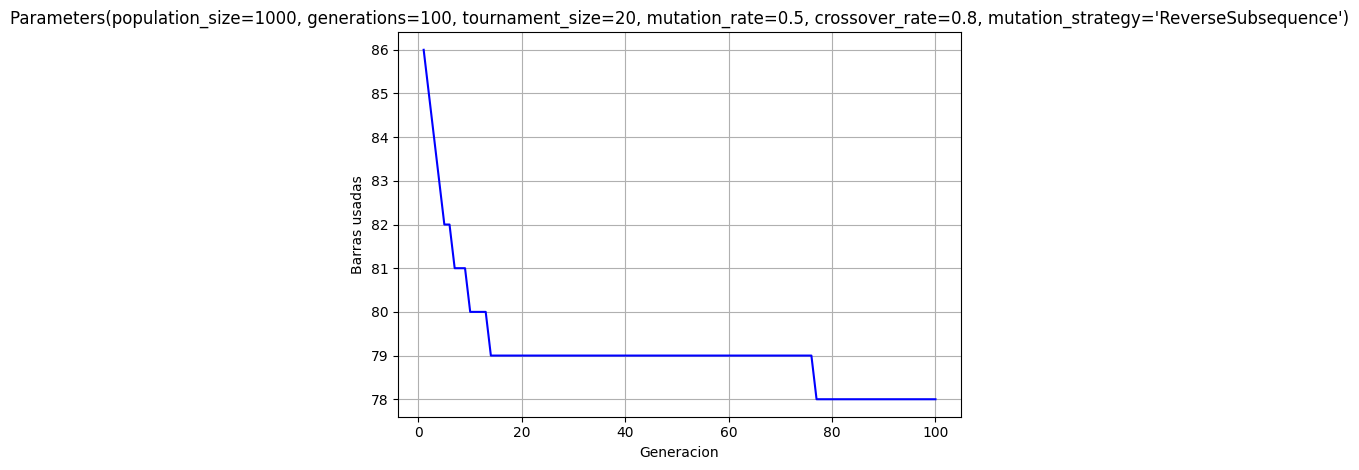

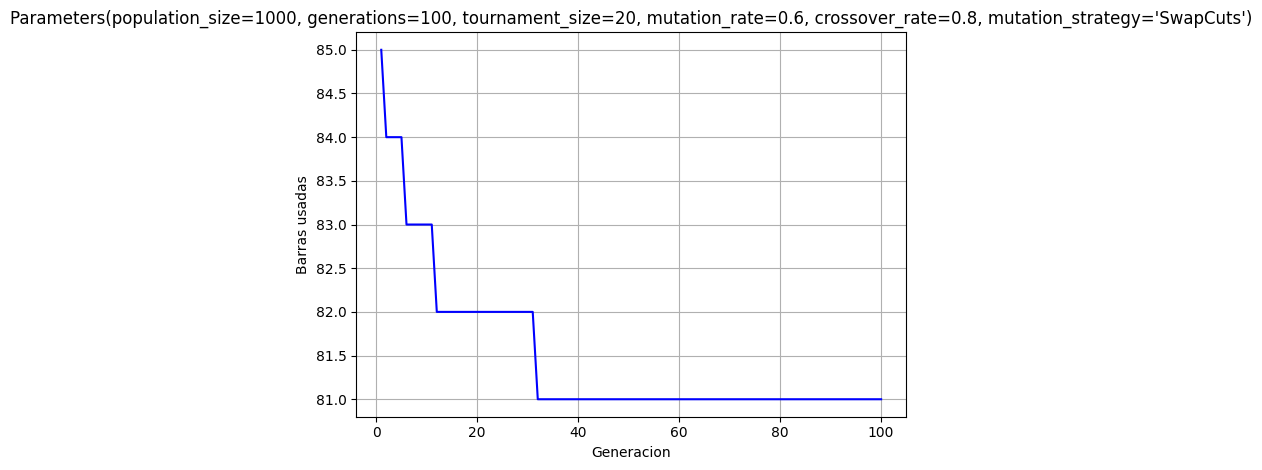

In [11]:
def show_plot_for_run(parameters: Parameters, result: SimulationResult):
    used_bars_by_generation = [solution.calculate_required_bars() for solution in result.best_solutions_by_generation]
    generations = list(range(1, result.generations + 1))

    plt.figure(
        # figsize=(8, 5)
    )
    plt.plot(
        generations,
        used_bars_by_generation,
        # marker="o",
        linestyle="-",
        color="blue",
    )
    plt.xlabel("Generacion")
    plt.ylabel("Barras usadas")
    plt.title(repr(parameters))
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    # plt.savefig("plot.png")

    plt.show()

for parameters, result in parameters_with_results:
    show_plot_for_run(parameters, result)